In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

print(drinks.info())

drinks.head(10)
drinks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
#국가별 음주 상관분석 함수 corr()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
#국가별 음주 상관분석 함수 corr()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


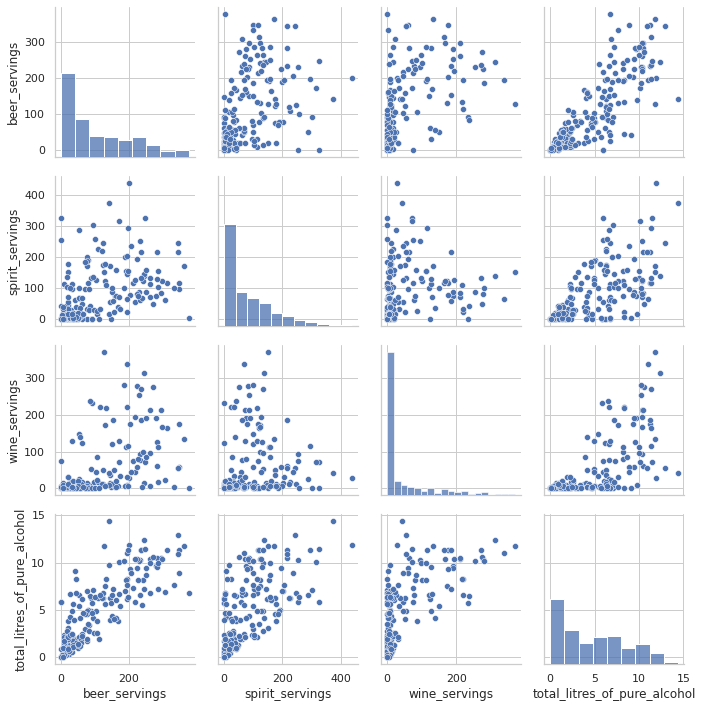

In [ ]:
#국가별 음주 seaborn
import pandas as pd
import seaborn as sns #그림의 크기 사이즈4종류 (paper, notebook, talk, poster)
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)

plt.show()

In [ ]:
#국가별 음주 결측 데이터 처리 fillna()함수

import pandas as pd

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

print(drinks.isnull().sum())

drinks['continent'] = drinks['continent'].fillna('OT')

print(drinks.isnull().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


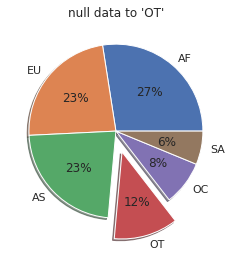

In [ ]:
#국가별 음주 결측 데이터 처리 fillna()함수

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

#결측 데ㅣ터를 처리 : 기타 ㅐ륙으로 통합 ->'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

labels =drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode=(0,0,0,0.25,0,0)


plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [ ]:
#agg() : 여러개의 열에 여러가지 함수를 적용
#.agg를 써서 모든 속성을 쓰면 여러 결과를 한버네 볼 수 있음
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

drinks['continent'] = drinks['continent'].fillna('OT')
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
print(result)

                 mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812
SA         114.750000   25  302  1377


In [ ]:
#agg() : 여러개의 열에 여러가지 함수를 적용
#.agg를 써서 모든 속성을 쓰면 여러 결과를 한버네 볼 수 있음
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

drinks['continent'] = drinks['continent'].fillna('OT')

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']
[3.0075471698113208, 2.1704545454545454, 8.617777777777778, 3.38125, 5.995652173913044, 6.308333333333334]
[3.0075471698113208, 2.1704545454545454, 8.617777777777778, 3.38125, 5.995652173913044, 6.308333333333334, 4.717098445595855]


Text(0.5, 1.0, 'total_litres_of_pure_alcohol by Continent')

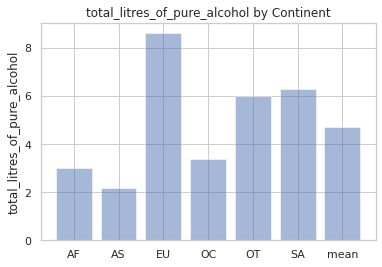

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path)

drinks['continent'] = drinks['continent'].fillna('OT')

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]

#대륙별 total_litres_of_pure_alcohol을 시각화
print(continent_mean)
continents = continent_mean.index.tolist()
print(continents)
continents.append('mean') #마지막에 mean이 추가됨
print(continents)

x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
print(alcohol)
alcohol.append(total_mean)
print(alcohol)

continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
plt.xticks(x_pos, continents)
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

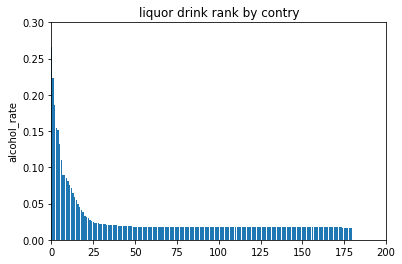

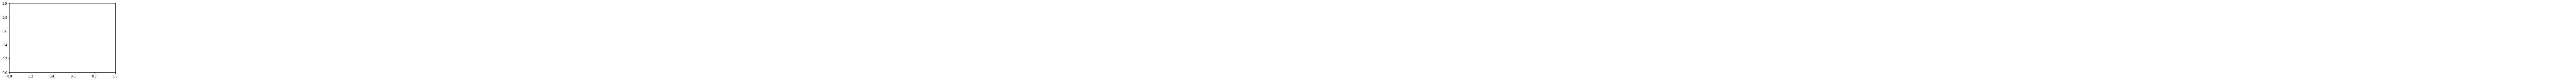

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drinks.csv'
drinks = pd.read_csv(file_path)

drinks['continent'] = drinks['continent'].fillna('OT') #빈 칸에 데이터 넣음

# total_servings 피처를 생성, 마지막 열에 생성됨
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings']+ drinks['spirit_servings']
#print(drinks)


#술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
#print(drinks)

#결측값을 0으로
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
#print(drinks)


#순위 정보를 생성합니다
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
bar_list = plt.bar(x_pos, rank)

plt.ylabel('alcohol_rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])
plt.show()

bar_list[country_list.index("South Korea")].set_color('r')

korea_rank = country_list.index("South Korea")
#print(korea_rank)
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
#print(country_with_rank)
#print(korea_alc_rate)
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy = (korea_rank, korea_alc_rate),
             xytext=(korea_rank + 10, korea_alc_rate +0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()